In [1]:
pip install networkx matplotlib python-louvain

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from an edges file
def load_graph(edge_file):
    G = nx.Graph()
    with open(edge_file, "r") as f:
        for line in f:
            node1, node2 = map(int, line.strip().split())  # Read user pairs
            G.add_edge(node1, node2)
    return G

# Example usage
G = load_graph("facebook_combined.txt.gz")  # Change filename accordingly
print(f"Graph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 33: character maps to <undefined>

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from an edges file
def load_graph(edge_file):
    G = nx.Graph()
    with open(edge_file, "r") as f:
        for line in f:
            node1, node2 = map(int, line.strip().split())  # Read user pairs
            G.add_edge(node1, node2)
    return G

# Example usage
G = load_graph("facebook_combined.txt.gz")  # Change filename accordingly
print(f"Graph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 33: character maps to <undefined>

In [4]:
import gzip
import networkx as nx

# Load the graph from a compressed .gz file
def load_graph(edge_file):
    G = nx.Graph()
    with gzip.open(edge_file, "rt", encoding="utf-8") as f:  # Open as text
        for line in f:
            node1, node2 = map(int, line.strip().split())  # Read user pairs
            G.add_edge(node1, node2)
    return G

# Example usage
G = load_graph("facebook_combined.txt.gz")  
print(f"Graph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


Graph Loaded: 4039 nodes, 88234 edges


In [5]:
import community as community_louvain  # Louvain algorithm for community detection

# Function to detect communities
def detect_communities(G):
    partition = community_louvain.best_partition(G)  # Returns a dict {node: community_id}
    return partition

# Apply the algorithm
communities = detect_communities(G)

# Print top 5 users with their community IDs
print(list(communities.items())[:5])



[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]


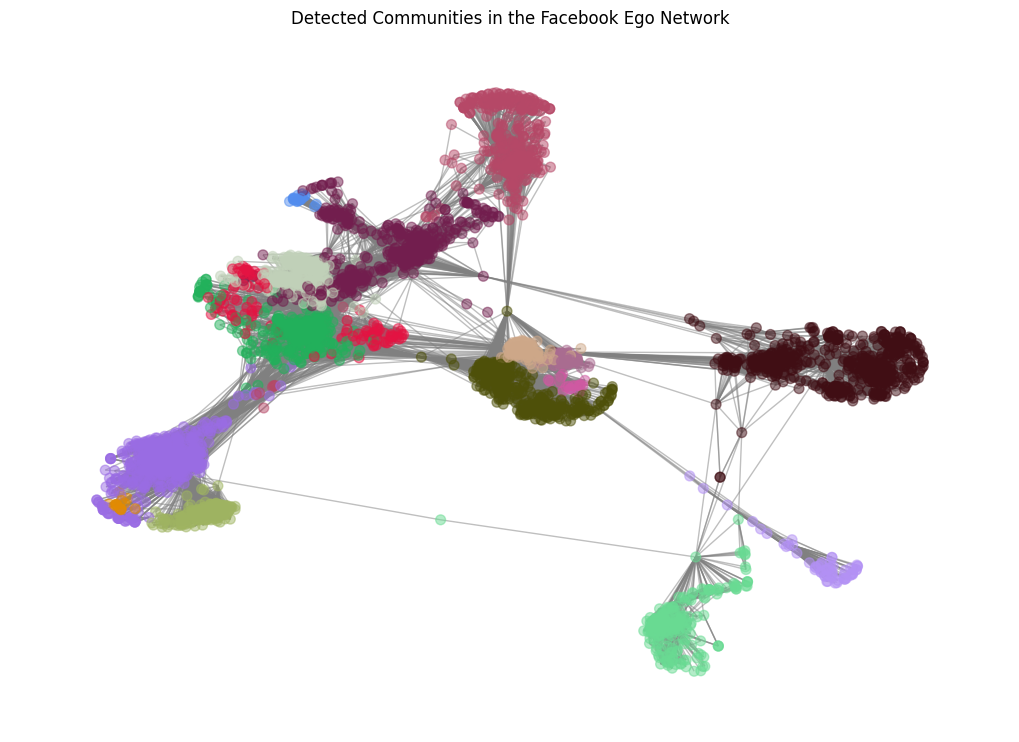

In [13]:
import random

def draw_communities(G, communities):
    # Assign colors to each community
    unique_communities = list(set(communities.values()))
    colors = {com: "#"+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for com in unique_communities}

    # Color nodes based on community
    node_colors = [colors[communities[node]] for node in G.nodes()]
    
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42,k=0.15, scale=1, iterations=100)
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray", alpha=0.5)
    plt.title("Detected Communities in the Facebook Ego Network")
    plt.show()

# Visualize
draw_communities(G, communities)


In [7]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import networkx as nx
import community as community_louvain
import pandas as pd


G = nx.read_edgelist("facebook_combined.txt.gz", create_using=nx.Graph(), nodetype=int)

# Compute centrality measures
def compute_centrality(G):
    centrality_measures = {
        "Degree": nx.degree_centrality(G),
        "Betweenness": nx.betweenness_centrality(G),
        "Closeness": nx.closeness_centrality(G),
        "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
        "PageRank": nx.pagerank(G)
    }
    return centrality_measures

# Get communities
communities = community_louvain.best_partition(G)

# Store centrality data
centrality_data = []
for community_id in set(communities.values()):
    subgraph_nodes = [node for node in G.nodes if communities[node] == community_id]
    subgraph = G.subgraph(subgraph_nodes)
    
    centrality = compute_centrality(subgraph)
    
    for node in subgraph_nodes:
        centrality_data.append({
            "Node": node,
            "Community": community_id,
            "Degree": centrality["Degree"].get(node, 0),
            "Betweenness": centrality["Betweenness"].get(node, 0),
            "Closeness": centrality["Closeness"].get(node, 0),
            "Eigenvector": centrality["Eigenvector"].get(node, 0),
            "PageRank": centrality["PageRank"].get(node, 0)
        })

# Convert to DataFrame for easy analysis
df = pd.DataFrame(centrality_data)

# Show top 10 influential users sorted by PageRank
df.sort_values(by="PageRank", ascending=False).head(10)


,Node,Community,Degree,Betweenness,Closeness,Eigenvector,PageRank
3529,3980,12,1.000000,0.795571,1.000000,0.469594,0.148823
0,0,0,0.979943,0.825146,0.980337,0.288830,0.073356
782,2670,2,1.000000,0.038710,1.000000,0.265225,0.065122
797,3318,2,1.000000,0.038710,1.000000,0.265225,0.065122
3795,1988,14,0.944444,0.037274,0.947368,0.267529,0.064803
3812,2650,14,0.944444,0.023253,0.947368,0.271609,0.064013
3799,2207,14,0.888889,0.042868,0.900000,0.248244,0.061727
3811,2622,14,0.888889,0.027651,0.900000,0.257760,0.061249
798,3325,2,0.944444,0.017686,0.947368,0.260074,0.061163
784,2703,2,0.944444,0.017686,0.947368,0.260074,0.061163


In [ ]:
def compute_total_dominating_set_nx(G, rounds=10, nodes_subset=None):
   
    # Work on a copy of the graph (or induced subgraph) so the original graph is not modified.
    if nodes_subset is not None:
        H = G.subgraph(nodes_subset).copy()
    else:
        H = G.copy()
    
    start_time = time.perf_counter()

    # Step 1: Initialize each node with a random weight, markedcount, and marked flag.
    for node in H.nodes():
        H.nodes[node]['weight'] = random.random()
        H.nodes[node]['markedcount'] = 0
        H.nodes[node]['marked'] = False

    # Step 2: Increase each node's weight by its degree.
    for node in H.nodes():
        H.nodes[node]['weight'] += H.degree[node]

    # Step 3: Each node marks the neighbor with the maximum weight.
    for node in H.nodes():
        max_weight_neighbor = None
        max_weight = -1
        for neighbor in H.neighbors(node):
            if H.nodes[neighbor]['weight'] > max_weight:
                max_weight = H.nodes[neighbor]['weight']
                max_weight_neighbor = neighbor
        if max_weight_neighbor is not None:
            H.nodes[max_weight_neighbor]['marked'] = True
            H.nodes[max_weight_neighbor]['markedcount'] += 1

    # Step 4: Repeated rounds to update weights and markings.
    for _ in range(rounds):
        # Reinitialize each node's weight: new random component plus the number of times it was marked.
        for node in H.nodes():
            H.nodes[node]['weight'] = random.random() + H.nodes[node]['markedcount']
            H.nodes[node]['markedcount'] = 0
            H.nodes[node]['marked'] = False

        # Each node marks its neighbor with the highest updated weight.
        for node in H.nodes():
            max_weight_neighbor = None
            max_weight = -1
            for neighbor in H.neighbors(node):
                if H.nodes[neighbor]['weight'] > max_weight:
                    max_weight = H.nodes[neighbor]['weight']
                    max_weight_neighbor = neighbor
            if max_weight_neighbor is not None:
                H.nodes[max_weight_neighbor]['marked'] = True
                H.nodes[max_weight_neighbor]['markedcount'] += 1

    # Step 5: The total dominating set is the collection of nodes that are marked.
    total_dominating_set = [node for node, data in H.nodes(data=True) if data.get('marked', False)]
    
    end_time = time.perf_counter()
    print("Time taken to compute total dominating set:", (end_time - start_time)*1000, "milliseconds")
    
    return total_dominating_set

# Example usage:
# Running on the entire graph:
mds_nodes = compute_total_dominating_set_nx(G, rounds=10)
print("Sample of MDS (Total Dominating Set) Nodes on entire graph:", mds_nodes[:10])


In [ ]:
# Compute the MDS for each community
community_mds = {}
for com in set(communities.values()):
    # Get nodes in the community
    community_nodes = [node for node in G.nodes() if communities[node] == com]
    
    # Compute the MDS on the subgraph induced by community_nodes.
    # Here, we assume compute_total_dominating_set_nx has been modified to accept an optional nodes_subset parameter.
    mds = compute_total_dominating_set_nx(G, rounds=10, nodes_subset=community_nodes)
    community_mds[com] = mds
    print(f"Community {com} - MDS Nodes: {mds}")

# Visualize each community with its MDS nodes highlighted
for com in set(communities.values()):
    community_nodes = [node for node in G.nodes() if communities[node] == com]
    subgraph = G.subgraph(community_nodes)
    mds_nodes = community_mds[com]
    
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph, seed=42)
    
    # Draw all nodes in light gray
    nx.draw_networkx_nodes(subgraph, pos, node_color='lightgray', node_size=30)
    # Draw edges
    nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.5)
    # Highlight the MDS nodes in red
    nx.draw_networkx_nodes(subgraph, pos, nodelist=mds_nodes, node_color='red', node_size=50)
    
    plt.title(f"Community {com} - MDS Nodes Highlighted")
    plt.show()


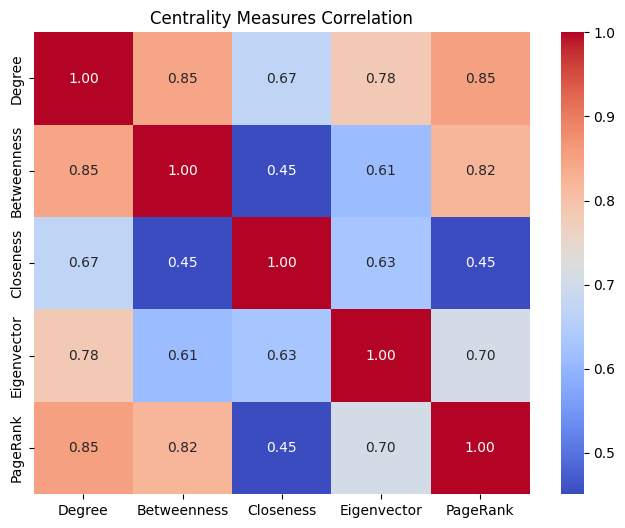

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["Degree", "Betweenness", "Closeness", "Eigenvector", "PageRank"]].corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Centrality Measures Correlation")
plt.show()


In [10]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
